In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training2.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.006206,0.000310,0.006724,0.874058,0.000103,0.000310,0.000310,0.0,0.000414,0.0,...,0.0,0.0,0.0,0.0,0.000207,0.207705,0.000828,0.000414,0.000517,208500
1,0.001873,0.000281,0.007492,0.899019,0.000094,0.000281,0.000281,0.0,0.000187,0.0,...,0.0,0.0,0.0,0.0,0.000468,0.187951,0.000749,0.000375,0.002903,181500
2,0.004914,0.000246,0.005569,0.921406,0.000082,0.000000,0.000246,0.0,0.000328,0.0,...,0.0,0.0,0.0,0.0,0.000737,0.164461,0.000655,0.000328,0.000573,223500
3,0.006596,0.000283,0.005654,0.899884,0.000094,0.000000,0.000283,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000188,0.189023,0.000754,0.000000,0.008575,140000
4,0.003961,0.000198,0.005545,0.941325,0.000066,0.000000,0.000198,0.0,0.000132,0.0,...,0.0,0.0,0.0,0.0,0.000792,0.132551,0.000528,0.000264,0.000528,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,40571.339041,64982.601014,0.449471
1,11,45039.147260,67747.002092,0.401635
2,12,47590.886986,78329.660750,0.200095
3,13,46050.287671,73494.106208,0.295808
4,14,44446.500000,79051.734835,0.185279
...,...,...,...,...
105,115,38287.119863,63079.513757,0.481244
106,116,41051.441781,70108.398680,0.359194
107,117,32953.979452,51762.583892,0.650684
108,118,35727.869863,58302.394483,0.556842


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
82,92,32825.712329,52917.104104,0.634928
107,117,32953.979452,51762.583892,0.650684
95,105,34016.979452,52051.086207,0.646780
85,95,34974.342466,52752.409677,0.637197
92,102,34987.753425,58896.915654,0.547758
...,...,...,...,...
9,19,48270.462329,79168.781364,0.182864
5,15,48425.246575,81077.808604,0.142982
19,29,49485.390411,78518.576518,0.196231
13,23,50694.188356,80794.543460,0.148959


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


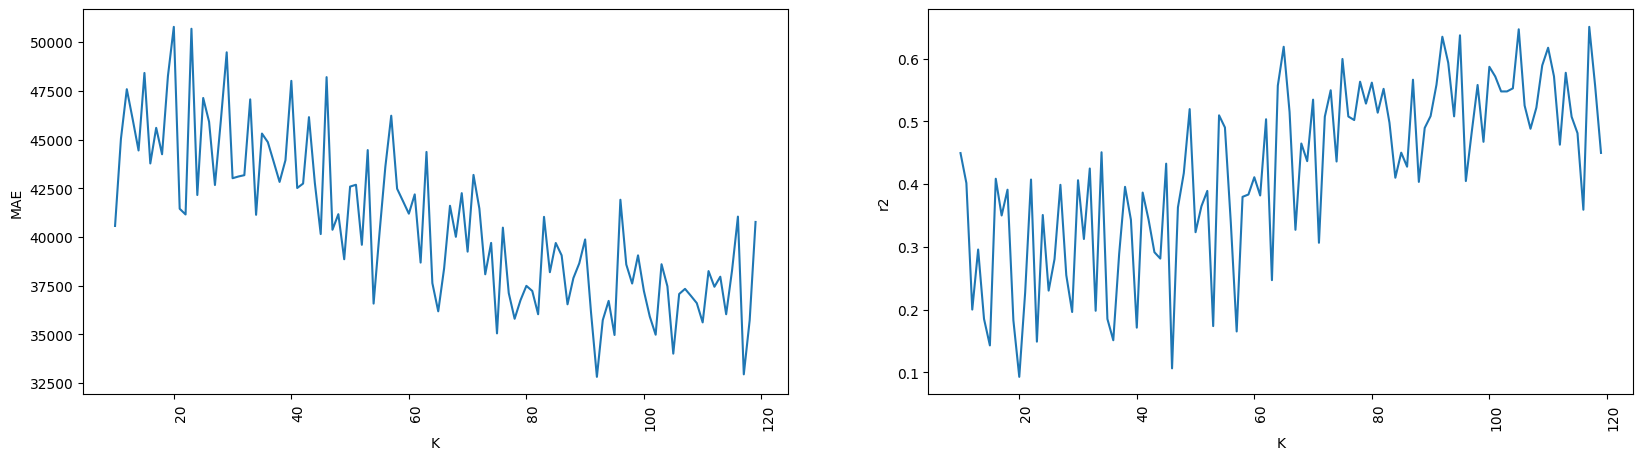

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       5.410530e-05
MSZoning         2.142145e-08
LotFrontage      3.361765e-06
LotArea          1.328744e-02
Street           1.282371e-09
                     ...     
YrSold           5.049716e-03
SaleType         1.002265e-07
SaleCondition    3.038631e-08
Ageofhouse       1.228008e-05
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,41342.613014,66231.793965,0.428101
1,101,42630.380137,64084.827369,0.464578
2,102,38168.284247,57365.018274,0.570977
3,103,41181.143836,58213.179000,0.558197
4,104,38929.184932,61474.732507,0.507304
...,...,...,...,...
395,495,41285.578767,63831.261939,0.468806
396,496,45844.284247,66930.798728,0.415966
397,497,38880.907534,61087.413027,0.513492
398,498,40403.948630,61340.463589,0.509453


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
388,488,36482.229452,55724.630568,0.595163
6,106,37279.565068,59210.555373,0.542928
203,303,37352.650685,52624.356963,0.638956
179,279,37651.119863,61244.844519,0.510982
62,162,37714.462329,58167.918244,0.558884
...,...,...,...,...
269,369,47215.013699,76569.187819,0.235647
294,394,47556.393836,77855.721782,0.209745
169,269,47611.791096,75559.756989,0.255667
342,442,48801.561644,78098.240031,0.204814


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


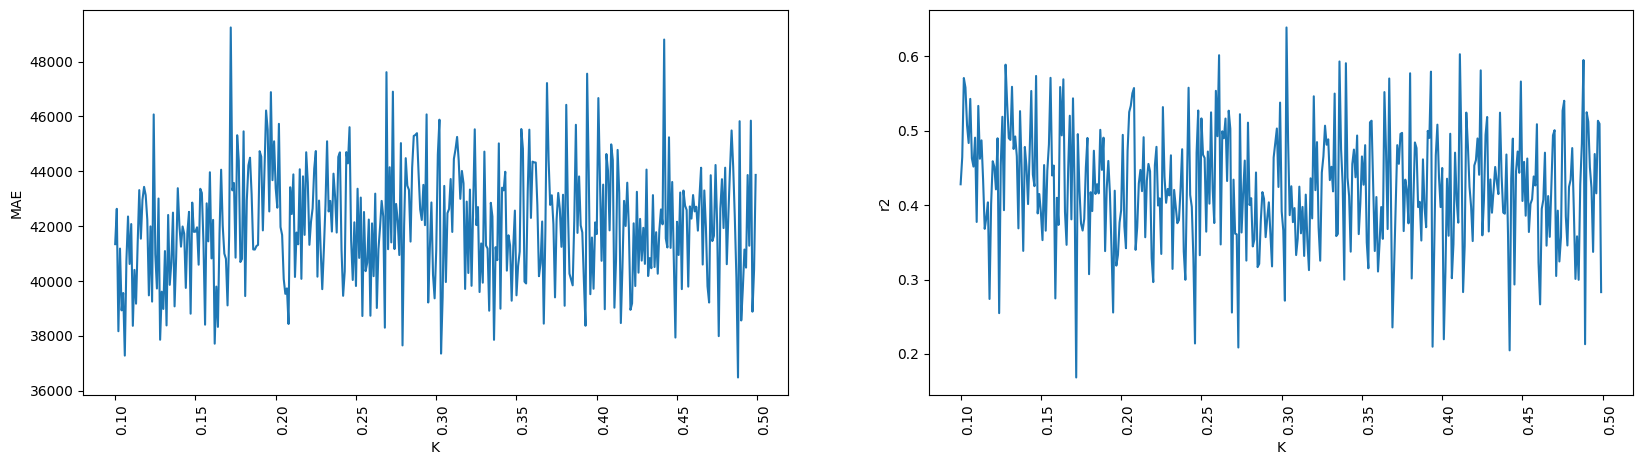

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


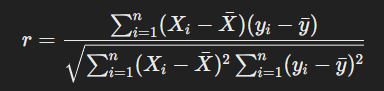

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.03043571179887997


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,43011.582192,68472.131485,0.388757
1,6,44402.897260,63939.568999,0.467002
2,7,42639.938356,67618.078259,0.403910
3,8,44718.075342,70086.777798,0.359590
4,9,42001.195205,69552.507619,0.369316
...,...,...,...,...
110,115,38559.369863,59978.209979,0.531000
111,116,36434.017123,57869.970251,0.563391
112,117,37460.452055,58691.248542,0.550911
113,118,35945.815068,56998.483508,0.576442


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
105,110,32594.756849,46101.538309,0.722912
98,103,33848.719178,50700.523553,0.664872
90,95,33872.678082,56003.031791,0.591107
88,93,34265.886986,52885.090070,0.635370
93,98,34831.544521,54511.618644,0.612596
...,...,...,...,...
9,14,49554.691781,81465.088468,0.134775
18,23,51925.503425,83474.711455,0.091560
6,11,52222.380137,89298.293864,-0.039615
5,10,52457.900685,79975.345112,0.166130


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


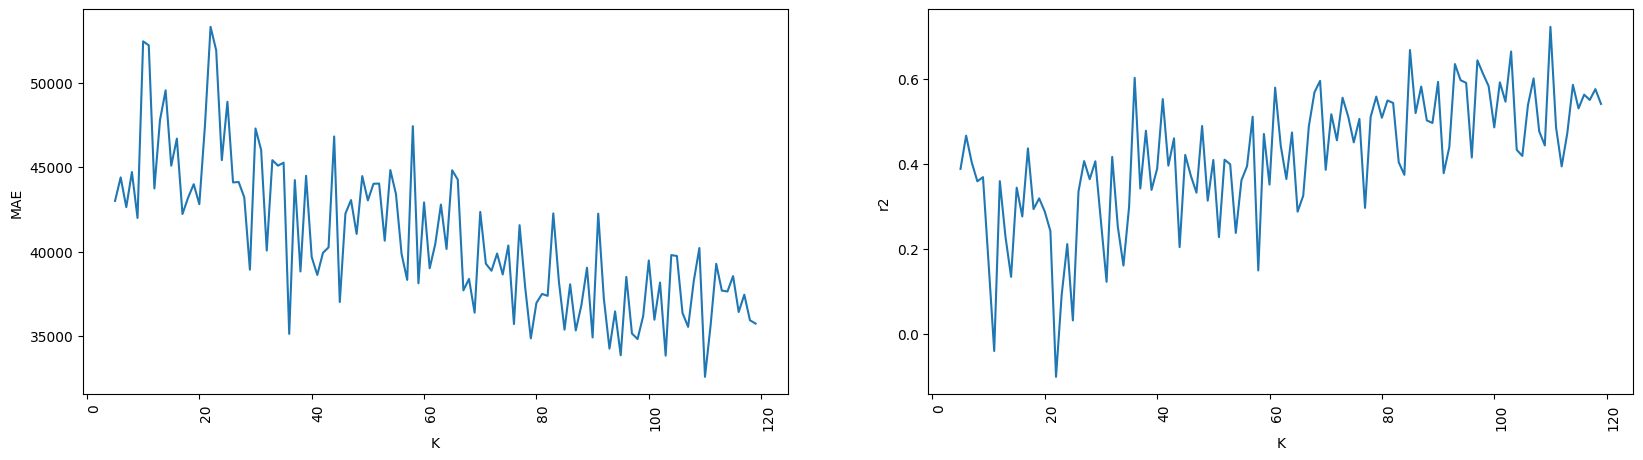

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

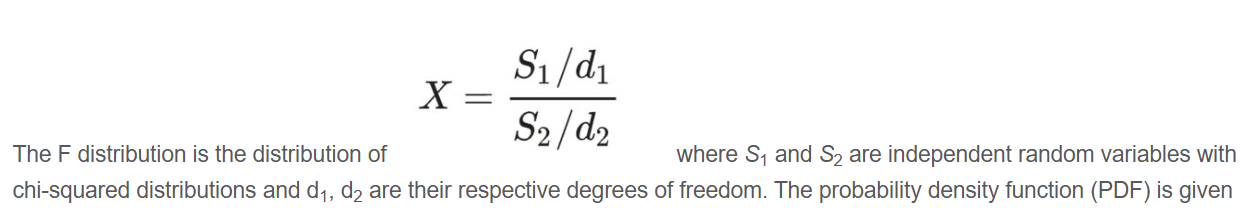

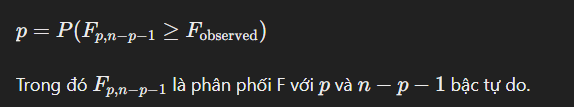

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,40822.592466,63378.071589,0.476322
1,6,41713.684932,67233.546607,0.410670
2,7,42923.013699,66302.431580,0.426881
3,8,41226.616438,69878.136914,0.363397
4,9,40135.982877,62269.206707,0.494486
...,...,...,...,...
110,115,35926.246575,58688.186796,0.550957
111,116,37399.226027,58682.991072,0.551037
112,117,39611.472603,61988.724439,0.499030
113,118,36609.465753,60044.777589,0.529958


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
98,103,32757.856164,51279.377355,0.657176
73,78,33781.660959,54959.772896,0.606200
55,60,34096.037671,51108.784731,0.659453
86,91,34561.493151,52505.579602,0.640584
37,42,34752.986301,52841.766885,0.635967
...,...,...,...,...
14,19,43942.421233,73708.454449,0.291694
40,45,43973.065068,71198.653468,0.339109
26,31,44477.708904,71929.165909,0.325478
39,44,44570.469178,70763.532890,0.347162


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


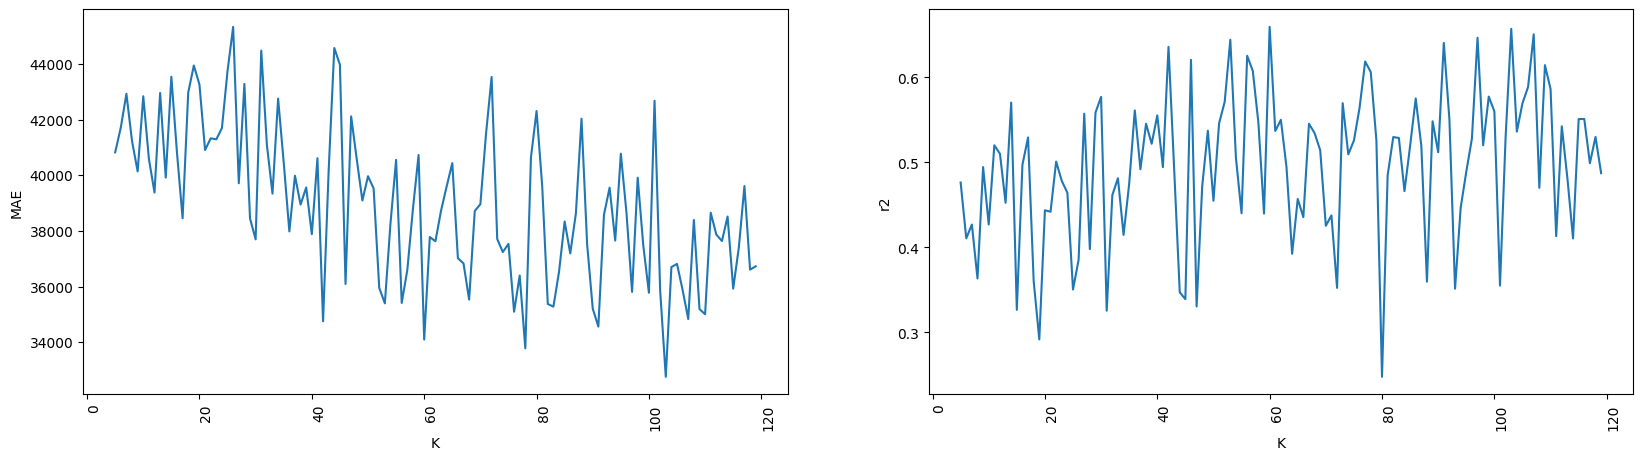

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

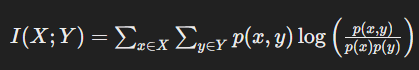

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

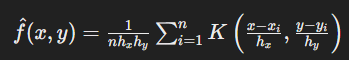

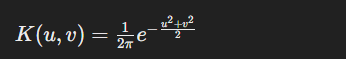

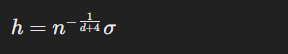

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,45199.339041,70110.828514,0.359150
1,6,44053.952055,70745.433317,0.347496
2,7,40691.873288,60547.199860,0.522059
3,8,38659.797945,59771.065781,0.534234
4,9,37489.123288,62246.218226,0.494860
...,...,...,...,...
110,115,37695.578767,57225.977704,0.573054
111,116,36778.924658,55270.373900,0.601736
112,117,35602.801370,56123.758458,0.589343
113,118,39798.445205,59839.548825,0.533166


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
59,64,34228.585616,50542.382697,0.666959
109,114,34291.852740,52594.098733,0.639371
72,77,34473.482877,53929.694585,0.620823
70,75,34646.065068,59793.724514,0.533880
106,111,34667.489726,55252.980977,0.601987
...,...,...,...,...
8,13,44478.424658,73076.191764,0.303794
50,55,44605.568493,77282.584717,0.221337
76,81,45054.239726,74428.637060,0.277785
0,5,45199.339041,70110.828514,0.359150


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20192\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


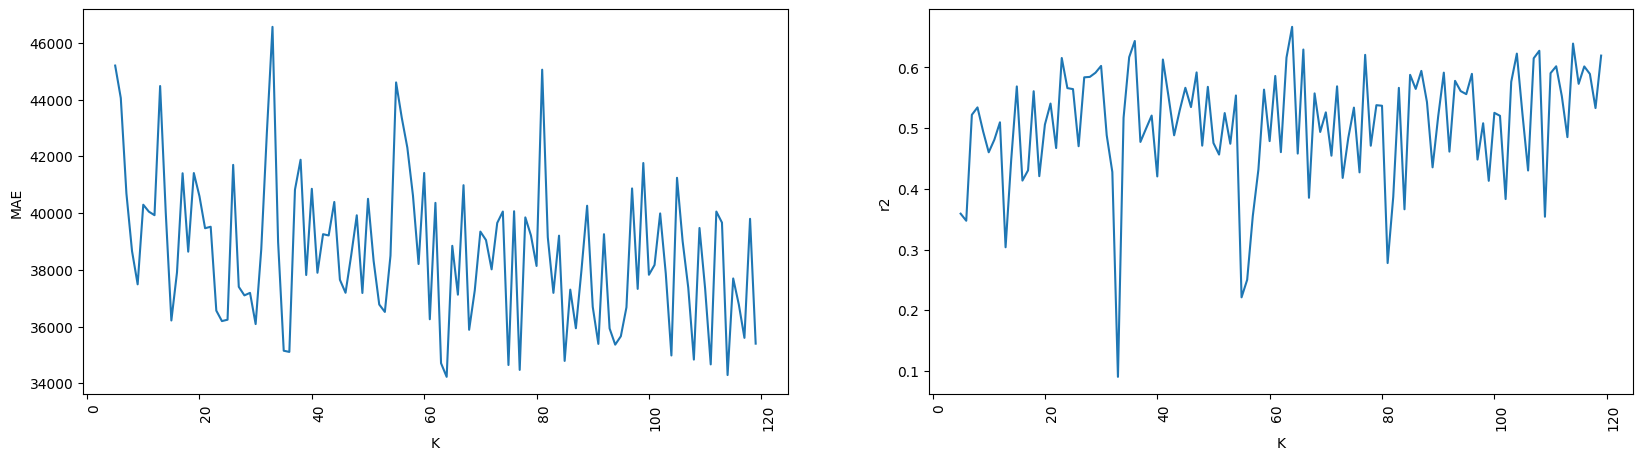

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987
1,6,30848.821918,48806.875191,0.689438
2,7,31759.996575,48543.677210,0.692779
3,8,35324.150685,58702.112897,0.550744
4,9,32119.191781,56446.864518,0.584601
...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705
111,116,33541.866438,57154.550185,0.574119
112,117,37123.773973,69512.773410,0.370036
113,118,33971.434932,51615.333079,0.652669


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,32216.571918,51029.290761,0.660511
1,6,31696.952055,51785.612944,0.650373
2,7,30930.285959,45474.885169,0.730394
3,8,28150.852740,41612.531800,0.774247
4,9,26277.441781,39881.420468,0.792639
...,...,...,...,...
110,115,33571.458904,57774.979377,0.564823
111,116,32946.318493,53217.789456,0.630768
112,117,32988.753425,50576.188337,0.666513
113,118,34779.452055,56433.891155,0.584792


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,45199.339041,70110.828514,0.359150
1,6,44053.952055,70745.433317,0.347496
2,7,40691.873288,60547.199860,0.522059
3,8,38659.797945,59771.065781,0.534234
4,9,37489.123288,62246.218226,0.494860
...,...,...,...,...
110,115,37695.578767,57225.977704,0.573054
111,116,36778.924658,55270.373900,0.601736
112,117,35602.801370,56123.758458,0.589343
113,118,39798.445205,59839.548825,0.533166


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639
...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511,45199.339041,70110.828514,0.359150
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373,44053.952055,70745.433317,0.347496
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394,40691.873288,60547.199860,0.522059
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247,38659.797945,59771.065781,0.534234
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639,37489.123288,62246.218226,0.494860
...,...,...,...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823,37695.578767,57225.977704,0.573054
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768,36778.924658,55270.373900,0.601736
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513,35602.801370,56123.758458,0.589343
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792,39798.445205,59839.548825,0.533166


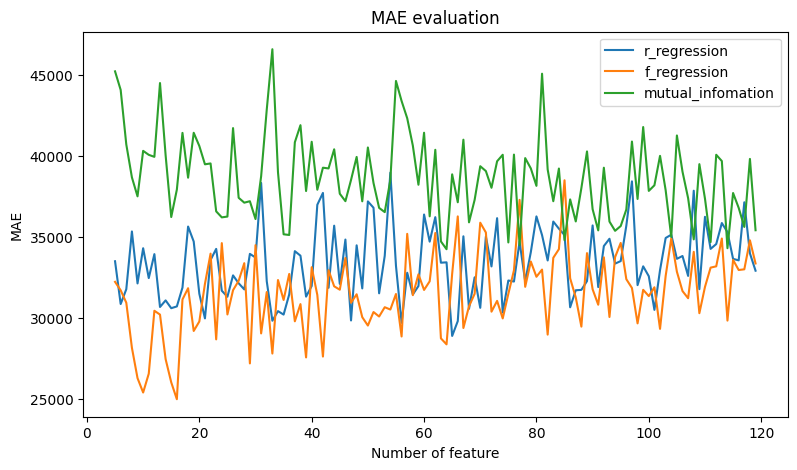

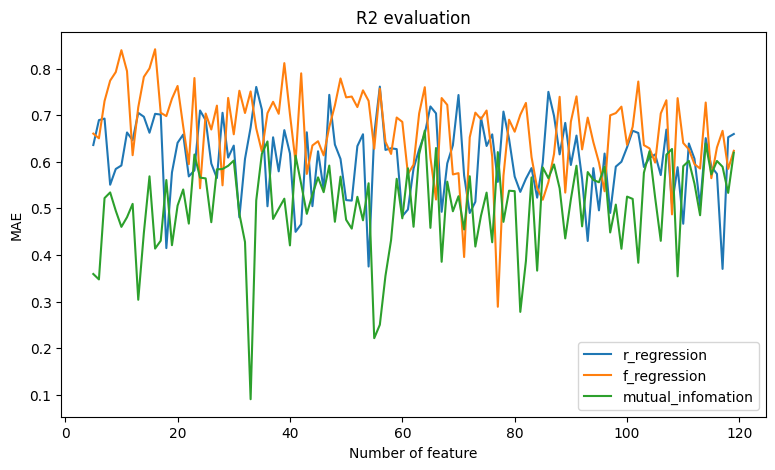

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()